## Black Friday
 (Data Science Fall 2018)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
% matplotlib inline
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

A retail company “ABC Private Limited” wants to understand the customer purchase behavior (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Exploratory data Analysis

This notebook has only the EDA portion. The modeling is shown in a different notebook since this could be a very lengthy part of the process. 

In [3]:
data=pd.read_csv('blackFriday.csv')

In [4]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
data.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

Should replace 4+ for 4

In [7]:
data.Stay_In_Current_City_Years = data.Stay_In_Current_City_Years.replace('4+', 4)
data.Age = data.Age.replace('0-17', '0_17')
data.Age = data.Age.replace('18-25', '18_25')
data.Age = data.Age.replace('26-35', '26_35')
data.Age = data.Age.replace('36-45', '36_45')
data.Age = data.Age.replace('46-50', '46_50')
data.Age = data.Age.replace('51-55', '51_55')
data.Age = data.Age.replace('55+', '55')

In [8]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0_17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0_17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0_17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0_17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55,16,C,4,0,8,NaN,NaN,7969


In [9]:
data.Stay_In_Current_City_Years.value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

That looks better

In [10]:
data.Product_Category_1.value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

Just to keep the same data type, changing Product Category 1 to float. Also Stay_In_Current_City_Years should be integer

In [11]:
data['Product_Category_1'] = data['Product_Category_1'].apply(np.float)

In [12]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(np.int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null float64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 50.4+ MB


In [14]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0_17,10,A,2,0,3.0,NaN,NaN,8370
1,1000001,P00248942,F,0_17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,P00087842,F,0_17,10,A,2,0,12.0,NaN,NaN,1422
3,1000001,P00085442,F,0_17,10,A,2,0,12.0,14.0,NaN,1057
4,1000002,P00285442,M,55,16,C,4,0,8.0,NaN,NaN,7969


Product 2 and Product 3 have NaN values. Let's leave them there for now. 

### Univariate

In [15]:
years_count = data.Stay_In_Current_City_Years.value_counts()
marital_count = data.Marital_Status.value_counts()
product1_count = data.Product_Category_1.value_counts()
product2_count = data.Product_Category_2.value_counts()
product3_count = data.Product_Category_3.value_counts()
purchase_count = data.Purchase.value_counts()

In [16]:
def bar_graph(y,x_ticks, ticks_labels, ylabels, title):
    figure = plt.figure(figsize= (10,8))
    x = range(len(y))
    width = 1/1.5
    axes = figure.add_subplot(1, 1, 1)
    axes.bar(x, y, width, color = 'steelblue', align = 'center')
    axes.set_xticks(x_ticks)
    axes.set_xticklabels(ticks_labels)
    axes.set_title(title)
    axes.set_ylabel(ylabels)
    axes.xaxis.grid(False)
    

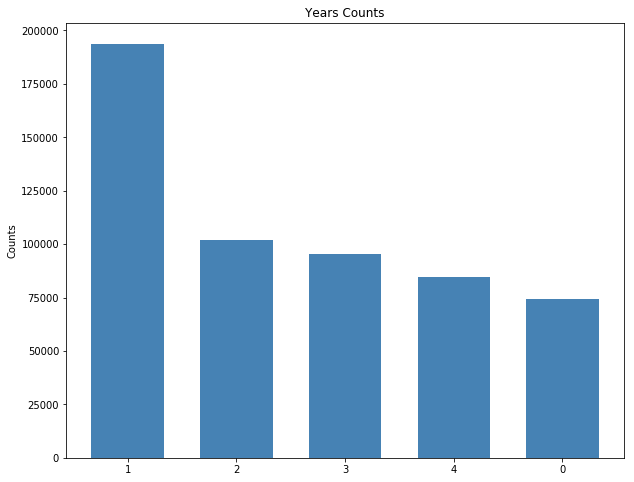

In [17]:
ticks= [0, 1, 2, 3, 4]
bar_graph(years_count, ticks, years_count.index, 'Counts', 'Years Counts')

There are more people who have been there for a year

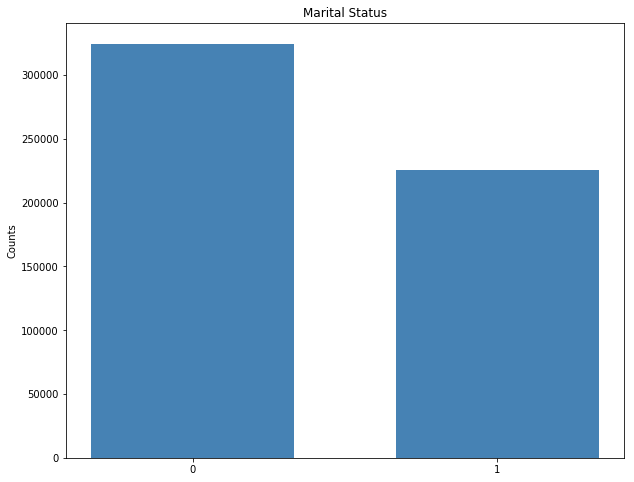

In [18]:
ticks=[0, 1]
bar_graph(marital_count, ticks, marital_count.axes[0], 'Counts', 'Marital Status')

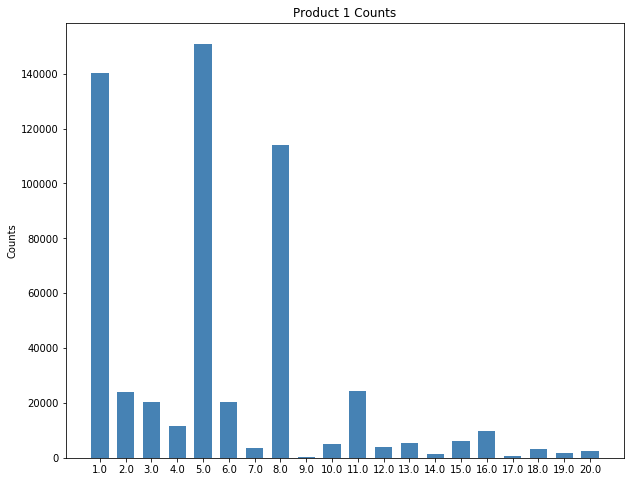

In [19]:
ticks = list(range(len(product1_count)))
bar_graph(product1_count.sort_index(), ticks, product1_count.sort_index().index, 'Counts', 'Product 1 Counts')

Most people buy 5, 1, 8 of this product category. No clear pattern here.

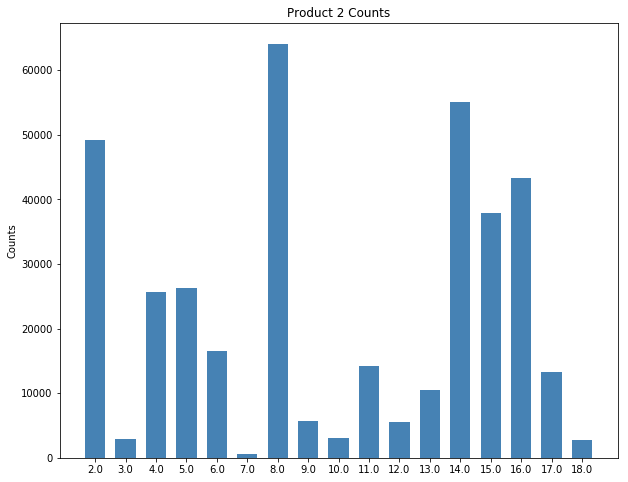

In [20]:
ticks = list(range(len(product2_count)))
bar_graph(product2_count.sort_index(), ticks, product2_count.sort_index().index, 'Counts', 'Product 2 Counts')

Most people buy 8, 14 and 2 of this product category. It looks bimodal, a big chunk of people get between 14 and 16 but 8 is the most prominant

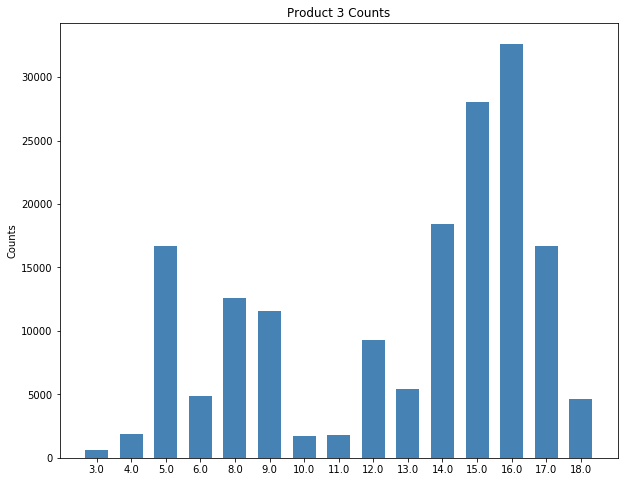

In [21]:
ticks = list(range(len(product3_count)))
bar_graph(product3_count.sort_index(), ticks, product3_count.sort_index().index, 'Counts', 'Product 3 Counts')

Most people buy between 14 and 17 in this product category. 

In [22]:
def hist_graph(x, bins, xlabel, ylabel, title ):
    figure = plt.figure(figsize= (10,8))

    axes = figure.add_subplot(1, 1, 1)
    axes.hist(x, bins = bins)
    axes.axvline(np.mean(x), color = 'DarkRed')
    axes.axvline(np.median(x), color = 'DarkOrange')
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    plt.show()

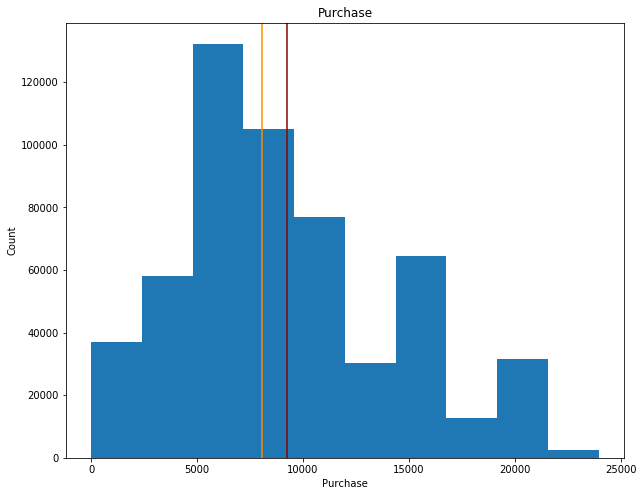

In [23]:
hist_graph(data['Purchase'], 10, 'Purchase', 'Count', 'Purchase')

Majority of people spend between 5k and 10k.  That's a lot of $$.

The distribution looks slightly skewed. I am curious to know how changing the bins size using Freeman Diaconis formula would look like. 

In [24]:
def freeman_diaconis( data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int( h)

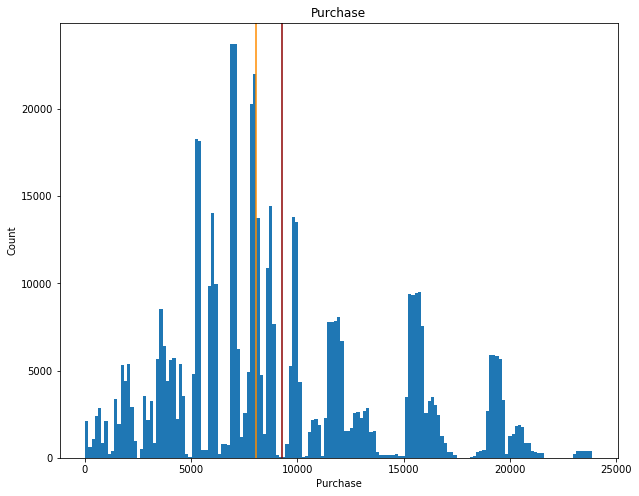

In [25]:
h=freeman_diaconis(data.Purchase)
mn = int(data.Purchase.min())
mx = int(data.Purchase.max())
bins = [i for i in range( mn, mx, h)]
hist_graph(data['Purchase'], bins, 'Purchase', 'Count', 'Purchase')

This is very interesting. A group of smaller distributions. It looks like grouping within certain price ranges. 

### Bivariate

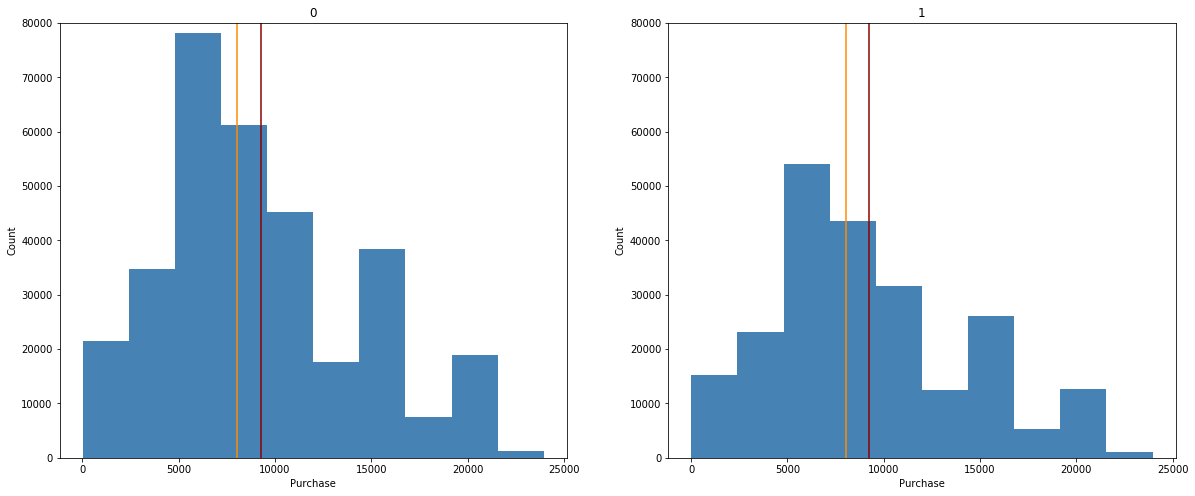

In [26]:
grouped = data.groupby("Marital_Status")
marital_group = grouped[ "Purchase"].describe()
marital = pd.unique(data['Marital_Status'].values)
figure = plt.figure(figsize=(20,8))
for i, j in enumerate(marital):
    axes = figure.add_subplot(1, 2, i+1)
    data_p = grouped['Purchase'].get_group(j).values
    axes.hist(data_p,color='steelblue')
    axes.axvline(np.mean(data_p), color = 'DarkRed')
    axes.axvline(np.median(data_p), color = 'DarkOrange')
    axes.set_title(j)
    axes.set_xlabel('Purchase')
    axes.set_ylabel('Count')
    axes.set_ylim(0,80000)
plt.show()

Nothing really jumps out, both distribution look very similar. In marital status = 1 looks more people spend between 5k and 10k.

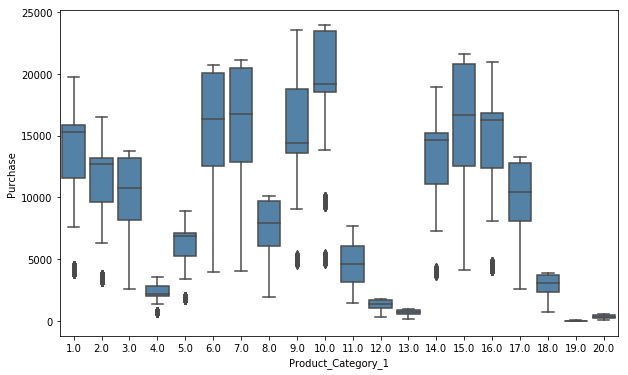

In [27]:
figure = plt.figure(figsize=(10, 6))
sns.boxplot(x="Product_Category_1", y="Purchase",  data=data.sort_values(by=['Product_Category_1']), color='steelblue')
plt.show()

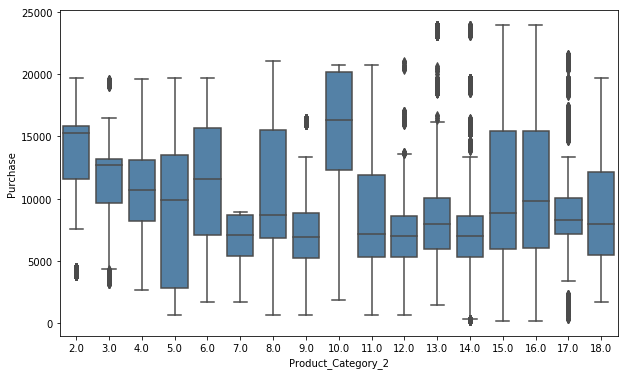

In [28]:
figure = plt.figure(figsize=(10, 6))
sns.boxplot(x="Product_Category_2", y="Purchase",  data=data.sort_values(by=['Product_Category_2']), color = 'steelblue')
plt.show()

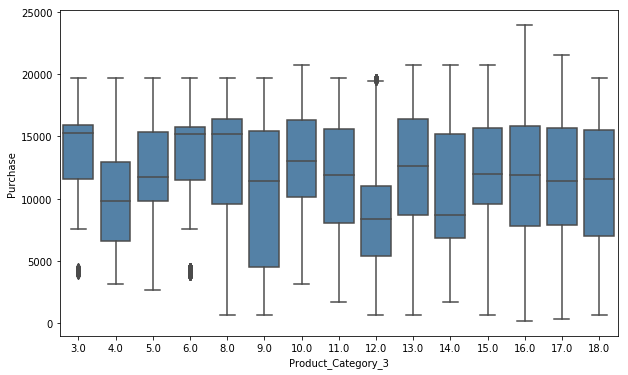

In [29]:
figure = plt.figure(figsize=(10, 6))
sns.boxplot(x="Product_Category_3", y="Purchase",  data=data.sort_values(by=['Product_Category_3']), color='steelblue')
plt.show()

Product Category 2 seems to be most popular between the 3 categories which is not surprising from the univariate EDA above. However, Product Category 2 and 3 have NAN values, so the graphs look a bit deceiving, gotta keep that in mind. 


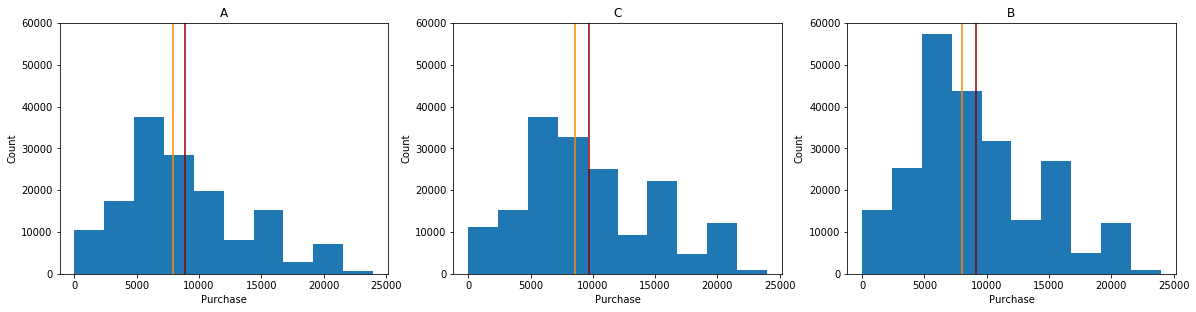

In [30]:
grouped = data.groupby("City_Category")

marital_group = grouped[ "Purchase"].describe()
marital = pd.unique(data['City_Category'].values)
figure = plt.figure(figsize=(20,60))
for i, j in enumerate(marital):
    axes = figure.add_subplot(11, 3, i+1)
    data_p = grouped['Purchase'].get_group(j).values
    axes.hist(data_p)
    axes.axvline(np.mean(data_p), color = 'DarkRed')
    axes.axvline(np.median(data_p), color = 'DarkOrange')
    axes.set_title(j)
    axes.set_xlabel('Purchase')
    axes.set_ylabel('Count')
    axes.set_ylim(0,60000)
plt.show()

City Category B seems to be spending the most money among the 3 categories. 

I tried several scatter plots but none seemed to be helpful so I decided not to include them. Adding a third variable such as marital status or stay in city didn't help either. So, instead I am including a very brief summary of the findings.  

In terms of population, we can gather from this EDA that the majority of buyers are:
* Marital Status = 1
* Age= 18-25
* City Category = B
* Stay in Current City = 4+
* Gender = Male



Since product categories have Nan values and looks like a product could be part of more than one category, let's try to group these by creating new feature so we can see how many categories a product belongs to:

In [31]:
def categoryNum(df):
    if not math.isnan(df['Product_Category_1']) and not math.isnan(df['Product_Category_2']) and not math.isnan(df['Product_Category_3']):
        return 3
    elif not math.isnan(df['Product_Category_1']) and not math.isnan(df['Product_Category_2']) and math.isnan(df['Product_Category_3']):
        return 2
    elif not math.isnan(df['Product_Category_1']) and math.isnan(df['Product_Category_2']) and not math.isnan(df['Product_Category_3']):
        return 2
    elif not math.isnan(df['Product_Category_1']) and math.isnan(df['Product_Category_2']) and math.isnan(df['Product_Category_3']):
        return 1

In [32]:
import math
data["categories"] = data.apply(categoryNum, axis=1)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,categories
0,1000001,P00069042,F,0_17,10,A,2,0,3.0,NaN,NaN,8370,1
1,1000001,P00248942,F,0_17,10,A,2,0,1.0,6.0,14.0,15200,3
2,1000001,P00087842,F,0_17,10,A,2,0,12.0,NaN,NaN,1422,1
3,1000001,P00085442,F,0_17,10,A,2,0,12.0,14.0,NaN,1057,2
4,1000002,P00285442,M,55,16,C,4,0,8.0,NaN,NaN,7969,1


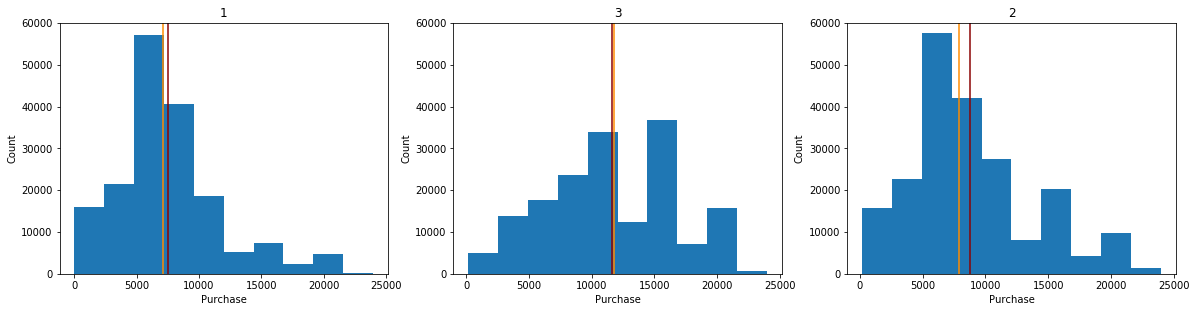

In [33]:
grouped = data.groupby("categories")

cat = pd.unique(data['categories'].values)
figure = plt.figure(figsize=(20,60))
for i, j in enumerate(cat):
    axes = figure.add_subplot(11, 3, i+1)
    data_p = grouped['Purchase'].get_group(j).values
    axes.hist(data_p)
    axes.axvline(np.mean(data_p), color = 'DarkRed')
    axes.axvline(np.median(data_p), color = 'DarkOrange')
    axes.set_title(j)
    axes.set_xlabel('Purchase')
    axes.set_ylabel('Count')
    axes.set_ylim(0,60000)
plt.show()

In [34]:
data.groupby('categories')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
categories,,,,,,,,
1,173638.0,7518.695389,4142.460056,12.0,5254.0,7075.0,8783.0,23959.0
2,209609.0,8804.312377,4913.735102,185.0,5397.0,7878.0,11566.0,23961.0
3,166821.0,11658.114980,5082.287959,185.0,7869.0,11756.0,15626.0,23959.0


The distributions look very similar. Looks like there are more products belonging to 2 categories. 